# <center> **Insights from the AWS SaaS Sales Dataset: Underlying Problems and How to Solve Them**</center>

This notebook was created to meet the requirements of Purwadhika's DTI Data Science program for Capstone Project 2. Using the AWS SaaS Sales Dataset, I formulated a series of problems based on the business needs and challenges faced by the company. As this project emphasizes data analysis, I assumed the role of a data analyst within the company.
<div style="text-align: right;">
    Created by: S. Fabilia (2024)
</div>

***

**What are the contents of this notebook?**
<br>
1. Background
2. Problem Statement
3. Data
<br>
3.1. Setup Data
<br>
3.2. Data Exploration
<br>
3.3. Data Cleaning
<br>
3.4. Data Review
4. Data Analysis
<br>
4.1. Sales, Quantity, and Profitability Overview
<br>
4.2. Geographical Performance Analysis
<br>
4.3. Customer Segmentation Analysis
<br>
4.4. Recency, Frequency, and Monetary (RFM) Analysis
5. Final Thoughts
<br>
5.1. Conclusion
<br>
5.2. Recommendation

***
## **1. Background**



Amazon Web Services (AWS) is the world's most comprehensive and broadly adopted cloud, offering over 200 fully featured services from data centers globally [(Amazon, 2024)](https://aws.amazon.com/what-is-aws/).
 As cloud computing has evolved, AWS has emerged as a top choice, providing a diverse mix of Infrastructure-as-a-Service (IaaS), Platform-as-a-Service (PaaS), and Software-as-a-Service (SaaS) solutions.

SaaS, or Software-as-a-Service, is a method of delivering applications over the Internet as a service [(Salesforce, 2024)](https://www.salesforce.com/ap/saas/). Instead of installing and maintaining software, users access it via the Internet, eliminating the complexities of software and hardware management. According to a [Canalys study](https://www.canalys.com/insights/hyperscale-cloud-marketplaces-saas-channels), cloud marketplaces are emerging as the fastest-growing route to market for SaaS software, projected to reach $45 billion by 2025, with an 84% compound annual growth rate (CAGR) over five years.

In Q1 2024, major cloud providers AWS, Google, Alibaba, Salesforce, Microsoft, and others competed in a $76 billion market [(Haranas, 2024)](https://www.crn.com/news/cloud/2024/aws-google-microsoft-battle-over-76b-q1-cloud-market-share?page=6). Amazon maintains a strong lead, holding a 31% market share, though Microsoft and Google showed stronger year-on-year growth at 25% and 11% respectively [(Synergy Research Group, 2024)](https://www.srgresearch.com/articles/huge-cloud-market-sees-a-strong-bounce-in-growth-rate-for-the-second-consecutive-quarter).

***
## **2. Problem Statement**

Despite AWS's leading position, its market share decreased from 33% in 2022 [(Synergy Research Group, 2022)](https://www.theregister.com/2022/05/02/cloud_market_share_q1_2022/) to 31% in 2024 [(Synergy Research Group, 2024)](https://www.srgresearch.com/articles/huge-cloud-market-sees-a-strong-bounce-in-growth-rate-for-the-second-consecutive-quarter). While this decline might seem minor, it is concerning given the competitive landscape. If AWS is inattentive to what is currently happening, other companies can take their throne. To address this, AWS must detect underlying problems and implement effective strategies to maintain and potentially increase its market share.

**The analysis of the AWS SaaS Sales Dataset aims to address the problems through these following questions:**
<br>
1. How have sales, profit, and quantity sold evolved over time, and can detailed insights into these trends determine if they are the primary reasons for AWS's market share decline?

2. Are there specific regions, countries, or cities where sales performance is consistently below average, and what factors might be contributing in these areas?

3. What does the current AWS customer segmentation look like according to the dataset, and are there additional suggestions beyond what is detailed in the dataset, along with actions we should take based on these segmentation insights?

**From the questions stated above, this report has 2 key arguments, which are:**
<br>
1. Understanding variations in sales, profit, and quantity sold by country, city, and region will reveal untapped opportunities and areas for improvement across different geographical areas.

2. Detailed customer segmentation and RFM (Recency, Frequency, Monetary) analysis will provide valuable insights into prospective sales targets, addressing potential gaps and opportunities identified in the dataset.

***
## **3. Data**

The AWS SaaS Sales Dataset comprises transactional information from an imaginary SaaS (Software as a Service) firm specializing in sales and marketing software for business-to-business (B2B) interactions. Each row in the dataset represents a product within a transaction, providing insights into the purchasing behavior of customers within the AWS ecosystem. The dataset descriptions are as follow:



| No.  | Field Name      | Description                                      |
|------|-----------------|--------------------------------------------------|
| 1    | Row ID          | A unique identifier for each transaction.        |
| 2    | Order ID        | A unique identifier for each order.              |
| 3    | Order Date      | The date when the order was placed.              |
| 4    | Date Key        | A numerical representation of the order date (MMDDYYYY).|
| 5    | Contact Name    | The name of the person who placed the order.     |
| 6    | Country         | The country where the order was placed.          |
| 7    | City            | The city where the order was placed.             |
| 8    | Region          | The region where the order was placed.           |
| 9    | Subregion       | The subregion where the order was placed.        |
| 10   | Customer        | The name of the company that placed the order.   |
| 11   | Customer ID     | A unique identifier for each customer.           |
| 12   | Industry        | The industry the customer belongs to.            |
| 13   | Segment         | The customer segment (SMB, Strategic, Enterprise, etc.).|
| 14   | Product         | The product that was ordered.                    |
| 15   | License         | The license key for the product.                 |
| 16   | Sales           | The total sales amount for the transaction.      |
| 17   | Quantity        | The total number of items in the transaction.    |
| 18   | Discount        | The discount applied to the transaction.         |
| 19   | Profit          | The profit from the transaction.                 |

### **3.1. Setup Data**

Before performing any operations on the data, it is essential to first import the necessary libraries and load the dataset.

#### **3.1.1 Importing Libraries**

In [125]:
import pandas as pd
import numpy as np
import random as rd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#### **3.1.2 Importing Dataset**

In [126]:
df = pd.read_csv('SaaS-Sales.csv')
df.head(5)

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


### **3.2. Data Exploration**

After loading the necessary libraries and dataset, the next step is to explore and understand the dataset's contents.

#### **3.2.1. Dataset Check**

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

The **datatype** of the columns are: integer, object, and float.





From df.info, we can conclude that the initial database have **9994 rows and 19 columns**.

This can be validated by checking the shape of the dataset.

In [128]:
print('Amount of Rows and Column:',df.shape)

Amount of Rows and Column: (9994, 19)


We can also examine the date range within the dataset to understand the time period it covers. However, we have to change the format of the column from object to datetime.

In [129]:
# change Order Date data type from object into datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
print(df['Order Date'].dtype)

# call for the earliest and the latest date
datasetDate = df.sort_values(by='Order Date')
display(datasetDate[['Order Date']].head(1))
display(datasetDate[['Order Date']].tail(1))

datetime64[ns]


,Order Date
7980,2020-01-04


,Order Date
906,2023-12-31


This means that the dataset contains dates ranging from **January 4, 2020, to December 31, 2023**.

#### **3.2.2. Unique Value**

After gaining an understanding of the dataset's contents, the next step is to identify and analyze the unique values within it.

In [130]:
# set maximum column width to display & create empty list
pd.set_option('display.max_colwidth',1000)
itemList = []

# creates a list containing column name, number of unique values, and the unique values
for col in df.columns :
    itemList.append( [col, df[col].nunique(), df[col].unique()])

# construct new DataFrame to be displayed
uniqueTable = pd.DataFrame(columns=['Column Name', 'Number of Unique Values', 'Sample of Unique Values'],
                     data=itemList)
uniqueTable

,Column Name,Number of Unique Values,Sample of Unique Values
0,Row ID,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, ...]"
1,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412, AMER-2022-161389, APJ-2021-118983, EMEA-2020-105893, EMEA-2020-167164, AMER-2020-143336, AMER-2022-137330, EMEA-2023-156909, EMEA-2021-106320, AMER-2022-121755, EMEA-2021-150630, APJ-2023-107727, APJ-2022-117590, APJ-2021-117415, APJ-2023-120999, AMER-2022-101343, EMEA-2023-139619, EMEA-2022-118255, AMER-2020-146703, APJ-2022-169194, APJ-2021-115742, EMEA-2022-105816, EMEA-2022-111682, AMER-2021-135545, APJ-2021-164175, AMER-2020-106376, EMEA-2022-119823, EMEA-2022-106075, AMER-2023-114440, EMEA-2021-134026, APJ-2023-118038, APJ-2020-147606, EMEA-2022-127208, AMER-2020-139451, EMEA-2021-149734, APJ-2023-119662, AMER-2023-140088, EMEA-2023-155558, APJ-2022-159695, AMER-2022-109806, EMEA-2021-149587, EMEA-2023-109484, EMEA-2023-161018, AMER-2023-157833, EMEA-2022-149223, APJ-2022-158568, EMEA-2022-129903, EMEA-2021-156867, EMEA-2023-119004, APJ-2021-129476, EMEA-2023-146780, EMEA-2022-128867, A..."
2,Order Date,1237,"[2022-11-09 00:00:00, 2022-06-13 00:00:00, 2021-10-11 00:00:00, 2020-06-09 00:00:00, 2023-04-16 00:00:00, 2022-12-06 00:00:00, 2021-11-22 00:00:00, 2020-11-11 00:00:00, 2020-05-13 00:00:00, 2020-08-27 00:00:00, 2022-12-10 00:00:00, 2023-07-17 00:00:00, 2021-09-25 00:00:00, 2022-01-16 00:00:00, 2021-09-17 00:00:00, 2023-10-20 00:00:00, 2022-12-09 00:00:00, 2021-12-27 00:00:00, 2023-09-11 00:00:00, 2022-07-18 00:00:00, 2023-09-20 00:00:00, 2022-03-12 00:00:00, 2020-10-20 00:00:00, 2022-06-21 00:00:00, 2021-04-18 00:00:00, 2022-12-12 00:00:00, 2022-06-18 00:00:00, 2021-11-24 00:00:00, 2021-04-30 00:00:00, 2020-12-05 00:00:00, 2022-06-05 00:00:00, 2022-09-19 00:00:00, 2023-09-15 00:00:00, 2021-04-26 00:00:00, 2023-12-10 00:00:00, 2020-11-26 00:00:00, 2020-10-12 00:00:00, 2021-09-03 00:00:00, 2023-11-14 00:00:00, 2023-05-29 00:00:00, 2023-10-27 00:00:00, 2022-04-06 00:00:00, 2022-09-18 00:00:00, 2021-01-31 00:00:00, 2023-11-07 00:00:00, 2023-11-10 00:00:00, 2023-06-18 00:00:00, 2022-09-..."
3,Date Key,1237,"[20221109, 20220613, 20211011, 20200609, 20230416, 20221206, 20211122, 20201111, 20200513, 20200827, 20221210, 20230717, 20210925, 20220116, 20210917, 20231020, 20221209, 20211227, 20230911, 20220718, 20230920, 20220312, 20201020, 20220621, 20210418, 20221212, 20220618, 20211124, 20210430, 20201205, 20220605, 20220919, 20230915, 20210426, 20231210, 20201126, 20201012, 20210903, 20231114, 20230529, 20231027, 20220406, 20220918, 20210131, 20231107, 20231110, 20230618, 20220907, 20220830, 20221202, 20211113, 20231124, 20211015, 20231226, 20221104, 20200825, 20210302, 20210405, 20201226, 20200920, 20231106, 20221107, 20230203, 20221014, 20220906, 20230919, 20231223, 20210907, 20201022, 20220314, 20210531, 20210528, 20200301, 20221121, 20220512, 20211228, 20221117, 20221108, 20200908, 20200805, 20200914, 20230422, 20211121, 20211215, 20201119, 20221129, 20200826, 20220717, 20211012, 20211031, 20200321, 20230707, 20230625, 20200803, 20231218, 20230604, 20231202, 20210209, 20210102, 20221..."
4,Contact Name,793,"[Nathan Bell, Deirdre Bailey, Zoe Hodges, Thomas Hodges, Adrian Hunter, Adrian Abraham, Emily Morrison, Claire Welch, Carol Campbell, Blake Hughes, Melanie Sharp, Luke Bower, Jonathan Ferguson, Sam Parsons, Neil Gill, Amelia Campbell, Chloe Short, Jasmine Metcalfe, Karen Mathis, Dylan Dickens, Sophie Lewis, Gavin Mitchell, Katherine Dowd, Harry Brown, Brian Dickens, Joseph Newman, Nicola Howard, Stewart Wilson, Eric McLean, Leah Clarkson, Alison

#### **3.2.3. Data Description**

After understanding the contents of the dataset, the next step is to examine its descriptive statistics.

In [131]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Row ID,9994.0,4997.5,1.0,2499.25,4997.5,7495.75,9994.0,2885.163629
Order Date,9994,2022-05-01 00:07:12.259355648,2020-01-04 00:00:00,2021-05-23 00:00:00,2022-06-27 00:00:00,2023-05-15 00:00:00,2023-12-31 00:00:00,NaN
Date Key,9994.0,20218026.46598,20200104.0,20210523.0,20220627.0,20230515.0,20231231.0,11238.975964
Customer ID,9994.0,1049.771963,1001.0,1024.0,1049.0,1076.0,1101.0,29.719388
Sales,9994.0,229.858001,0.444,17.28,54.49,209.94,22638.48,623.245101
Quantity,9994.0,3.789574,1.0,2.0,3.0,5.0,14.0,2.22511
Discount,9994.0,0.156203,0.0,0.0,0.2,0.2,0.8,0.206452
Profit,9994.0,28.656896,-6599.978,1.72875,8.6665,29.364,8399.976,234.260108


As shown, the transposed data makes it easier to view the numerical columns.

Below, you can find further information about the non-numerical columns.

In [132]:
df.describe(include='object').T

,count,unique,top,freq
Order ID,9994,5009,EMEA-2023-100111,14
Contact Name,9994,793,Leonard Kelly,37
Country,9994,48,United States,2001
City,9994,262,London,922
Region,9994,3,EMEA,4219
Subregion,9994,12,NAMER,2507
Customer,9994,99,Allianz,192
Industry,9994,10,Finance,2127
Segment,9994,3,SMB,5191
Product,9994,14,ContactMatcher,1842


### **3.3. Data Cleaning**

#### **3.3.1. Handling Missing Values**

Each column **doesn't have any null values**, as indicated by the non-null count matching the number of rows (as shown by df.info()). This means there is no need to fill in any missing values.

This can be further confirmed by using the *isnull* method.

In [133]:
df.isnull().any()

Row ID          False
Order ID        False
Order Date      False
Date Key        False
Contact Name    False
Country         False
City            False
Region          False
Subregion       False
Customer        False
Customer ID     False
Industry        False
Segment         False
Product         False
License         False
Sales           False
Quantity        False
Discount        False
Profit          False
dtype: bool

#### **3.3.2. Duplicates**

It's crucial to check for duplicates as they can significantly impact the outcome of the analysis.

In [134]:
df.duplicated().any()

False

As seen from checking the duplicates, there are **no duplicates**. Thus, there are no records that needs to be dropped.

#### **3.3.3. Standardizing Data Format**

As stated above, even though there is an order date column, the data type is object. To ease the analysis, we need to change it to datetime.

*the code below is an example, we did the data type change several rows above*

In [135]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
print(df['Order Date'].dtype)

datetime64[ns]


#### **3.3.4. Redundant Columns**

We should drop redundant columns because they do not provide additional meaningful information for analysis and can unnecessarily increase complexity. The columns we're going to drop are:
<br>
1. **Row ID**: Only useful for internal data management and doesn't provide any analytical value.

2. **Date Key**: Because we already have the Order Date column in a usable format, the Date Key column is redundant.

3. **Contact Name**: Personal info is not necessary as we will not analyze it by individual contacts (AWS SaaS is a B2B business).

4. **Customer ID**: Because we already have the Customer column in a usable format, the Customer ID column is redundant.

4. **License**: As the license key is unique for each transaction, it does not provide analytical value.

In [136]:
df = df.drop(columns=['Row ID'])
df = df.drop(columns=['Date Key'])
df = df.drop(columns=['Contact Name'])
df = df.drop(columns=['Customer ID'])
df = df.drop(columns=['License'])

#### **3.3.5 Outlier Checking**

Outliers needs to be checked because they are extreme values in a dataset that can significantly impact statistical analyses, hypothesis tests, and regression models.

We begin by identifying and categorizing outliers in 'Profit','Quantity','Sales', and 'Discount' with 'Product' for grouping.

In [137]:
# create a dataframe with selected columns
num_data = df[['Sales','Quantity','Discount','Profit']]
num_data

,Sales,Quantity,Discount,Profit
0,261.9600,2,0.00,41.9136
1,731.9400,3,0.00,219.5820
2,14.6200,2,0.00,6.8714
3,957.5775,5,0.45,-383.0310
4,22.3680,2,0.20,2.5164
...,...,...,...,...
9989,25.2480,3,0.20,4.1028
9990,91.9600,2,0.00,15.6332
9991,258.5760,2,0.20,19.3932
9992,29.6000,4,0.00,13.3200


For an easier overview, I turned the data into **histogram** and **boxplot**.

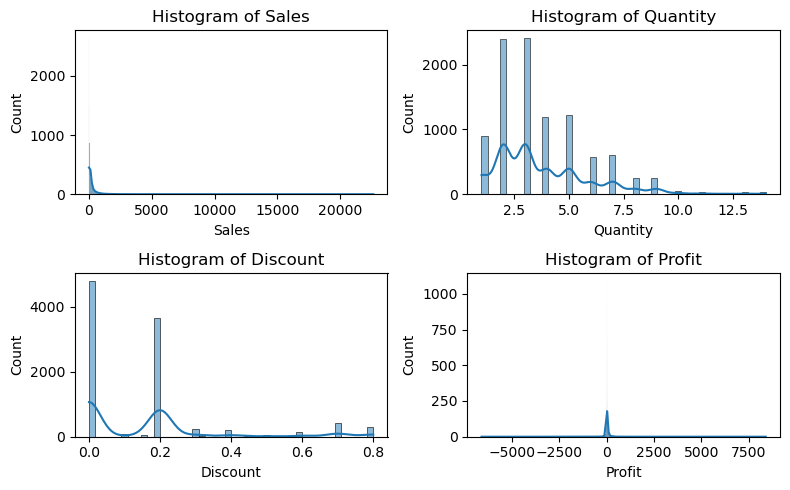

In [138]:
# resize the figure
fig, axes = plt.subplots(2, 2, figsize=(8, 5))

# flatten the axes array for easy iteration
axes = axes.flatten()

# loop through the dataframe columns and create histograms
for i, column in enumerate(num_data.columns):
    sns.histplot(num_data[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')

# adjust layout
fig.tight_layout()

# show the plot
plt.show()

Observing the histogram, we note the following:
<br>
- Sales displays a right skew, indicating a non-normal distribution.
- Quantity also exhibits a right skew, suggesting a non-normal distribution.
- Similarly, Discount shows a right skew, indicating departure from normality.
- On the other hand, Profit appears to follow a relatively normal distribution upon initial examination.

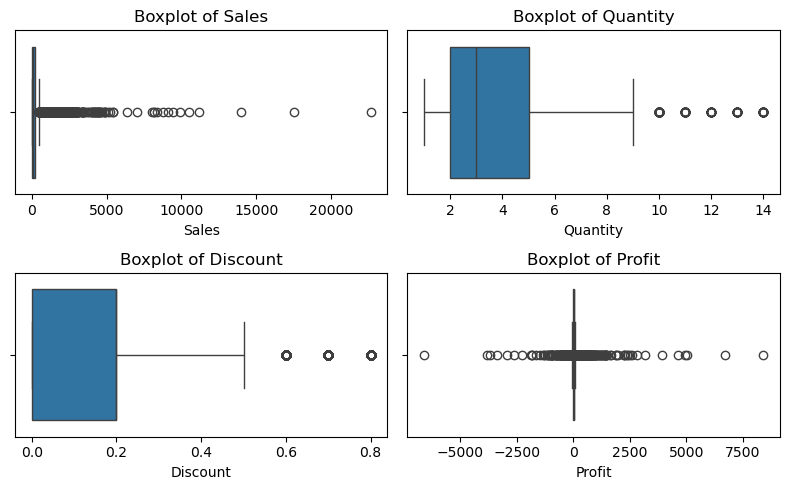

In [139]:
# resize the figure
fig, axes = plt.subplots(2, 2, figsize=(8, 5))

# flatten the axes array for easy iteration
axes = axes.flatten()

# loop through the dataframe columns and create boxplots
for i, column in enumerate(num_data.columns):
    sns.boxplot(x=num_data[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')

# adjust layout
fig.tight_layout()

# show the plot
plt.show()

Upon inspection, it's evident that numerous outliers are present, particularly noticeable in the Sales and Profit columns.
<br>
- Sales: Transactions span a wide range, with a majority falling into smaller value categories, yet a considerable number feature significantly larger values, leading to a right-skewed distribution.

- Quantity: While most transactions involve modest quantities (typically 2-5 units per purchase), a subset exhibits higher quantities exceeding 10 units, resulting in a right-skewed distribution.

- Discount: Discounts primarily cluster within the range of 0.0 to 0.2; however, outliers are evident at values exceeding 0.6, contributing to a right-skewed distribution.

- Profit: While the overall distribution of profits appears symmetrical, the presence of numerous extreme values, both negative and positive, indicates non-normality, rendering the data distribution non-normal.

Now, we begin identifying the outlier by calculating the Q1, Q3, IQR, lower and upper bound to get the number of outliers

In [140]:
Q1 = num_data[['Sales','Quantity','Discount','Profit']].quantile(0.25)
print('Q1 are:')
print(Q1)

Q1 are:
Sales       17.28000
Quantity     2.00000
Discount     0.00000
Profit       1.72875
Name: 0.25, dtype: float64


In [141]:
Q3 = num_data[['Sales','Quantity','Discount','Profit']].quantile(0.75)
print('Q3 are:')
print(Q3)

Q3 are:
Sales       209.940
Quantity      5.000
Discount      0.200
Profit       29.364
Name: 0.75, dtype: float64


In [142]:
IQR = Q3 - Q1
print('The IQR are:')
print(IQR)

The IQR are:
Sales       192.66000
Quantity      3.00000
Discount      0.20000
Profit       27.63525
dtype: float64


In [143]:
lower_bound = Q1 - 1.5 * IQR
print('The lower bound are:')
print(lower_bound)

The lower bound are:
Sales      -271.710000
Quantity     -2.500000
Discount     -0.300000
Profit      -39.724125
dtype: float64


In [144]:
upper_bound = Q3 + 1.5 * IQR
print('The upper bound are:')
print(upper_bound)

The upper bound are:
Sales       498.930000
Quantity      9.500000
Discount      0.500000
Profit       70.816875
dtype: float64


Thus, we will get this as a result:

In [145]:
# to count the number of outliers
for columns in num_data.columns:
  q1 = num_data[[columns]].describe().loc['25%']
  q3 = num_data[[columns]].describe().loc['75%']
  iqr = q3 - q1
  whis = 1.5 * iqr
  upper_bound = float(q3 + whis)
  lower_bound = float(q1 - whis)

  total_outliers = len(df[(num_data[columns] < lower_bound) | (num_data[columns] > upper_bound)])
  print(f'{columns} have {total_outliers} outliers.')

Sales have 1167 outliers.
Quantity have 170 outliers.
Discount have 856 outliers.
Profit have 1881 outliers.


Having identified the abundance of outliers, it's best to scrutinize their relevance before deciding if the outliers needs to be dropped or not.

This assessment will involve examining the highest values in the discount and quantity columns, as inferred from the outliers in the right side of the boxplot.

In [146]:
# Top 5 entries with the highest quantities
high_quantity_df = df[df['Quantity'] > 9][['Sales','Quantity','Discount','Profit']].sort_values(by=['Quantity', 'Profit'], ascending=False)
print("Top 5 transactions with the highest quantities:")
high_quantity_df.head(5)

Top 5 transactions with the highest quantities:


,Sales,Quantity,Discount,Profit
1711,1702.120,14,0.0,510.6360
7387,1336.440,14,0.0,387.5676
8935,1119.888,14,0.2,209.9790
1429,427.420,14,0.0,196.6132
1433,1819.860,14,0.0,163.7874


In [147]:
# Top 5 entries with the highest discounts
high_discount_df = df[df['Discount'] > 0.5][['Sales','Quantity','Discount','Profit']].sort_values(by=['Discount', 'Profit'], ascending=[False, True])
print("Top 5 transactions with the highest discounts:")
high_discount_df.head(5)

Top 5 transactions with the highest discounts:


,Sales,Quantity,Discount,Profit
9774,2177.584,8,0.8,-3701.8928
4991,1889.990,5,0.8,-2929.4845
5310,1525.188,6,0.8,-2287.7820
1199,1088.792,4,0.8,-1850.9464
3324,896.990,5,0.8,-1480.0335


There is **no need to drop the outliers** because the values appear logically explainable rather than anomalous.

For instance, in the quantity column, values exceeding 9 (as observed from the graph) are considered outliers. These higher quantities are associated with significant increases in both profit and sales, thus categorizing the data as outliers. The highest quantity observed is 14, which is reasonable in the context of a company purchasing 14 licenses.

Similarly, in the discount column, values above 0.5 (as observed from the graph) indicate a sharp decrease in profit and an increase in sales. This behavior aligns with expected market dynamics where higher discounts can drive sales at the expense of profit margins. The highest discount observed is 0.8, which makes sense as it could be part of a marketing strategy.

High-impact transactions, such as those with high quantities or significant discounts, can provide insights into special cases of strategic importance. These might include bulk purchases, significant discounts, or special promotions that are valuable for business strategy and decision-making.

**Dropping these outliers could result in the loss of critical insights into these high-impact areas.** This consideration is particularly crucial as we plan to conduct an RFM (Recency, Frequency, Monetary) analysis later, where understanding these high-value transactions will be essential.

### **3.4. Data Review**

The result of the cleaning are as follow:

In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order ID    9994 non-null   object        
 1   Order Date  9994 non-null   datetime64[ns]
 2   Country     9994 non-null   object        
 3   City        9994 non-null   object        
 4   Region      9994 non-null   object        
 5   Subregion   9994 non-null   object        
 6   Customer    9994 non-null   object        
 7   Industry    9994 non-null   object        
 8   Segment     9994 non-null   object        
 9   Product     9994 non-null   object        
 10  Sales       9994 non-null   float64       
 11  Quantity    9994 non-null   int64         
 12  Discount    9994 non-null   float64       
 13  Profit      9994 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(9)
memory usage: 1.1+ MB


In [149]:
df.head(5)

,Order ID,Order Date,Country,City,Region,Subregion,Customer,Industry,Segment,Product,Sales,Quantity,Discount,Profit
0,EMEA-2022-152156,2022-11-09,Ireland,Dublin,EMEA,UKIR,Chevron,Energy,SMB,Marketing Suite,261.9600,2,0.00,41.9136
1,EMEA-2022-152156,2022-11-09,Ireland,Dublin,EMEA,UKIR,Chevron,Energy,SMB,FinanceHub,731.9400,3,0.00,219.5820
2,AMER-2022-138688,2022-06-13,United States,New York City,AMER,NAMER,Phillips 66,Energy,Strategic,FinanceHub,14.6200,2,0.00,6.8714
3,EMEA-2021-108966,2021-10-11,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,Energy,SMB,ContactMatcher,957.5775,5,0.45,-383.0310
4,EMEA-2021-108966,2021-10-11,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,Energy,SMB,Marketing Suite - Gold,22.3680,2,0.20,2.5164


After that, we can export the clean dataset as a csv.

In [150]:
df.to_csv(r"SaaS_Clean.csv", index=False)

***
## **4. Data Analysis**

#### **4.1. Sales, Profit, and Quantity Sold Overview**

Before delving into the specifics, it's crucial to take a look at each year's performance. With AWS's market share dropping 2% over two years, we need to compare sales, profit, and quantity sold annually to understand the bigger picture. While market share is primarily a measure of sales, profitability and quantity sold can indirectly impact a company's ability to grow and maintain its market share.

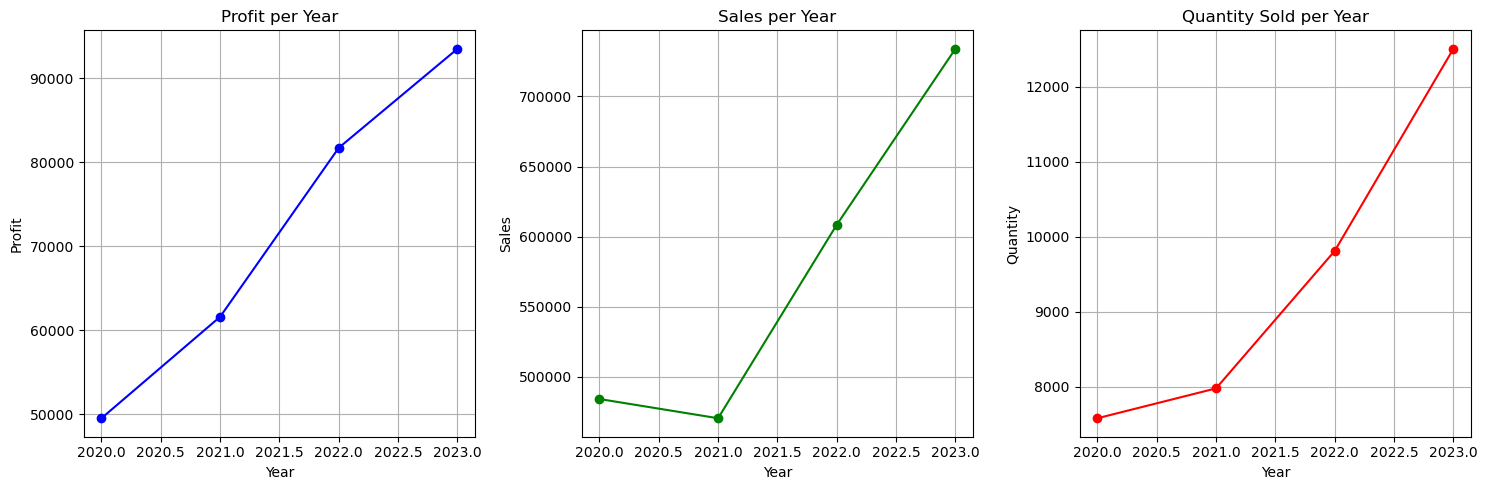

In [151]:
# Assume df is defined and contains the necessary data
df['Year'] = df['Order Date'].dt.year
df['Year'] = df['Year'].astype(int)

# Group by year and calculate yearly profit, sales, and quantity
yearly_profit = df.groupby('Year')['Profit'].sum().reset_index()
yearly_sales = df.groupby('Year')['Sales'].sum().reset_index()
yearly_quantity = df.groupby('Year')['Quantity'].sum().reset_index()

# Create a canvas with 3 subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot profit per year
axes[0].plot(yearly_profit['Year'], yearly_profit['Profit'], marker='o', linestyle='-', color='blue')
axes[0].set_title('Profit per Year')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Profit')
axes[0].grid(True)

# Plot sales per year
axes[1].plot(yearly_sales['Year'], yearly_sales['Sales'], marker='o', linestyle='-', color='green')
axes[1].set_title('Sales per Year')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Sales')
axes[1].grid(True)

# Plot quantity sold per year
axes[2].plot(yearly_quantity['Year'], yearly_quantity['Quantity'], marker='o', linestyle='-', color='red')
axes[2].set_title('Quantity Sold per Year')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('Quantity')
axes[2].grid(True)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

The **profit** plot reflects the growing prominence of Software as a Service (SaaS), demonstrating a consistent increase in profit each year. This trend aligns with the expanding adoption of SaaS solutions across industries.

Conversely, the **sales** plot exhibits a temporary decline between 2020 and 2022, coinciding with the global impact of the COVID-19 pandemic. Despite this setback, the organization rebounded resiliently, experiencing a subsequent surge in sales, indicative of effective adaptation and recovery efforts.

Similarly, the **plot** depicts quantity sold per year mirrors an upward trajectory, underscoring a sustained positive trend in product demand and distribution.

Surprisingly, **this trend does not align with the observed drop in AWS's market share**. This discrepancy prompts the need for further investigation to uncover additional insights and potential contributing factors.

#### **4.2. Geographical Performance Analysis**

Our analysis will commence by examining data at the regional level, followed by a more granular exploration at the country and city levels.

#### **4.2.1 Metrics per Region**

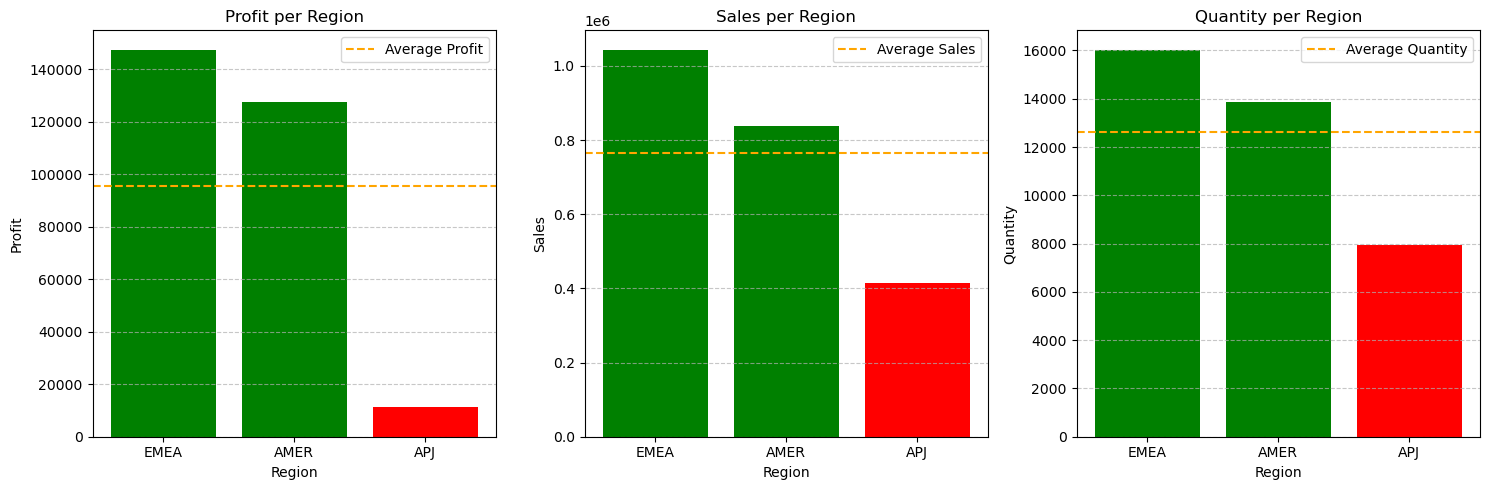

In [152]:
# create a barplot to compare metrics per region
def plot_metrics_per_region(df):
    metrics = ['Profit', 'Sales', 'Quantity']
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

    for i, metric_name in enumerate(metrics):
        region_metric = df.groupby('Region')[metric_name].sum()
        region_metric = region_metric.sort_values(ascending=False)
        avg_metric = region_metric.mean()
        colors = ['green' if value >= avg_metric else 'red' for value in region_metric]

        axes[i].bar(region_metric.index, region_metric, color=colors)
        axes[i].axhline(y=avg_metric, color='orange', linestyle='--', linewidth=1.5, label=f'Average {metric_name}')
        axes[i].set_title(f'{metric_name} per Region')
        axes[i].set_xlabel('Region')
        axes[i].set_ylabel(metric_name)
        axes[i].legend()
        axes[i].grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()

# Example usage:
plot_metrics_per_region(df)

After analyzing the data, it is evident that **APJ emerges as the weakest performing region overall**. This conclusion is drawn from its consistent ranking as the lowest across all metrics, including profit, sales, and quantity.

From this point onwards, the analysis will focus on APJ.

#### **4.2.2. Metrics per Country**

Next, we will analyze the metrics per country. Analyzing metrics per country provides insights into the performance and market dynamics of individual regions within the APJ region.

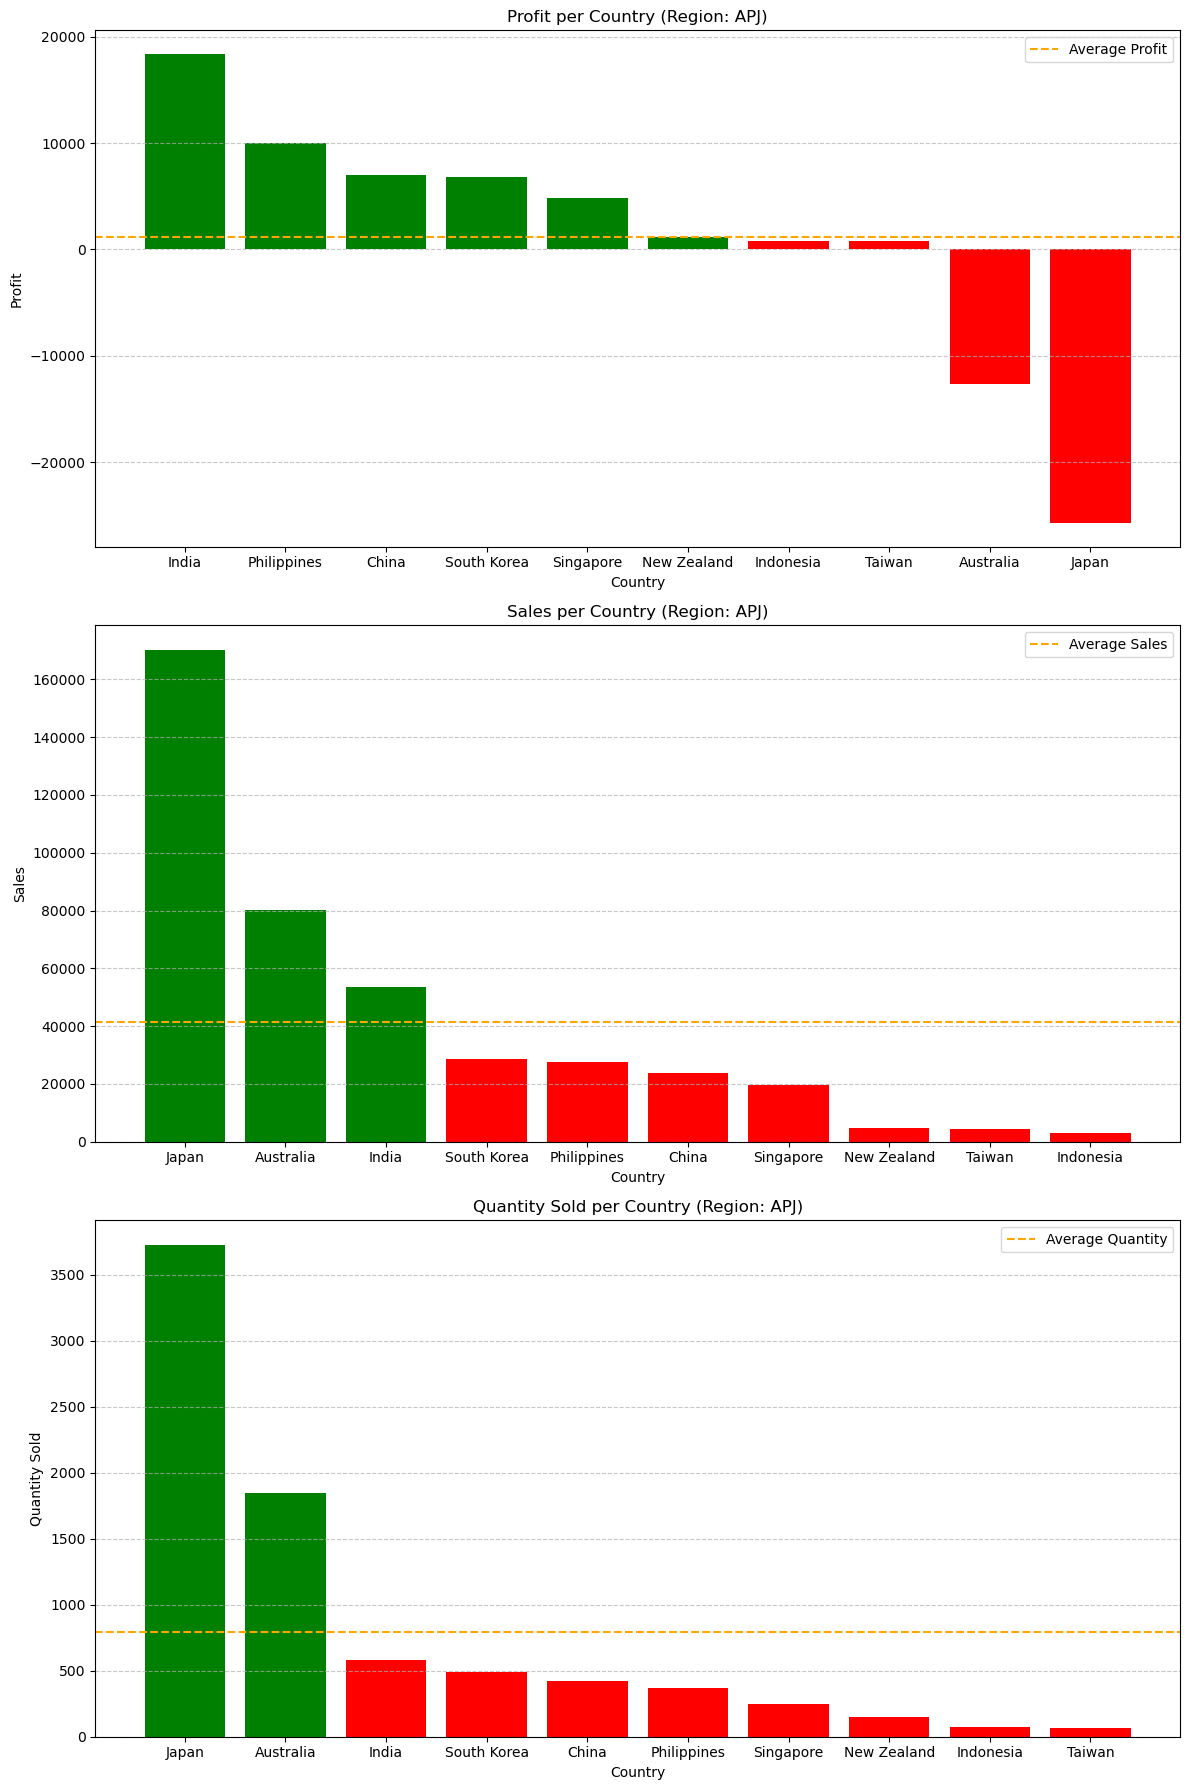

In [153]:
# Define the data for APJ region
df_apj = df[df['Region'] == 'APJ']

# Group by country and calculate profit, sales, and quantity
country_profit = df_apj.groupby('Country')['Profit'].sum().sort_values(ascending=False)
country_sales = df_apj.groupby('Country')['Sales'].sum().sort_values(ascending=False)
country_quantity = df_apj.groupby('Country')['Quantity'].sum().sort_values(ascending=False)

# Calculate average values
avg_profit = country_profit.mean()
avg_sales = country_sales.mean()
avg_quantity = country_quantity.mean()

# Create a canvas with 3 subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Plot profit per country
colors = ['green' if profit >= avg_profit else 'red' for profit in country_profit]
axes[0].bar(country_profit.index, country_profit, color=colors)
axes[0].axhline(y=avg_profit, color='orange', linestyle='--', linewidth=1.5, label='Average Profit')
axes[0].set_title('Profit per Country (Region: APJ)')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Profit')
axes[0].legend()
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot sales per country
colors = ['green' if sales >= avg_sales else 'red' for sales in country_sales]
axes[1].bar(country_sales.index, country_sales, color=colors)
axes[1].axhline(y=avg_sales, color='orange', linestyle='--', linewidth=1.5, label='Average Sales')
axes[1].set_title('Sales per Country (Region: APJ)')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Sales')
axes[1].legend()
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Plot quantity sold per country
colors = ['green' if quantity >= avg_quantity else 'red' for quantity in country_quantity]
axes[2].bar(country_quantity.index, country_quantity, color=colors)
axes[2].axhline(y=avg_quantity, color='orange', linestyle='--', linewidth=1.5, label='Average Quantity')
axes[2].set_title('Quantity Sold per Country (Region: APJ)')
axes[2].set_xlabel('Country')
axes[2].set_ylabel('Quantity Sold')
axes[2].legend()
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

Based on the analysis, the **top-performing countries in the APJ region** are:

**Profit:**
1. India
2. Philippines
3. China

**Sales:**
1. Japan
2. Australia
3. India

**Quantity:**
1. Japan
2. Australia
3. India (but the quantity is below average)

Conversely, **the worst-performing countries in the APJ region** are:

**Profit:**
1. Japan
2. Australia
3. Taiwan

**Sales:**
1. Indonesia
2. Taiwan
3. New Zealand

**Quantity:**
1. Taiwan
2. Indonesia
3. New Zealand

Next, we will delve into the performance per city, focusing solely on the cities mentioned in the worst-performing countries (Japan, Australia, Taiwan, Indonesia, and New Zealand).

#### **4.2.3. Metrics per City**

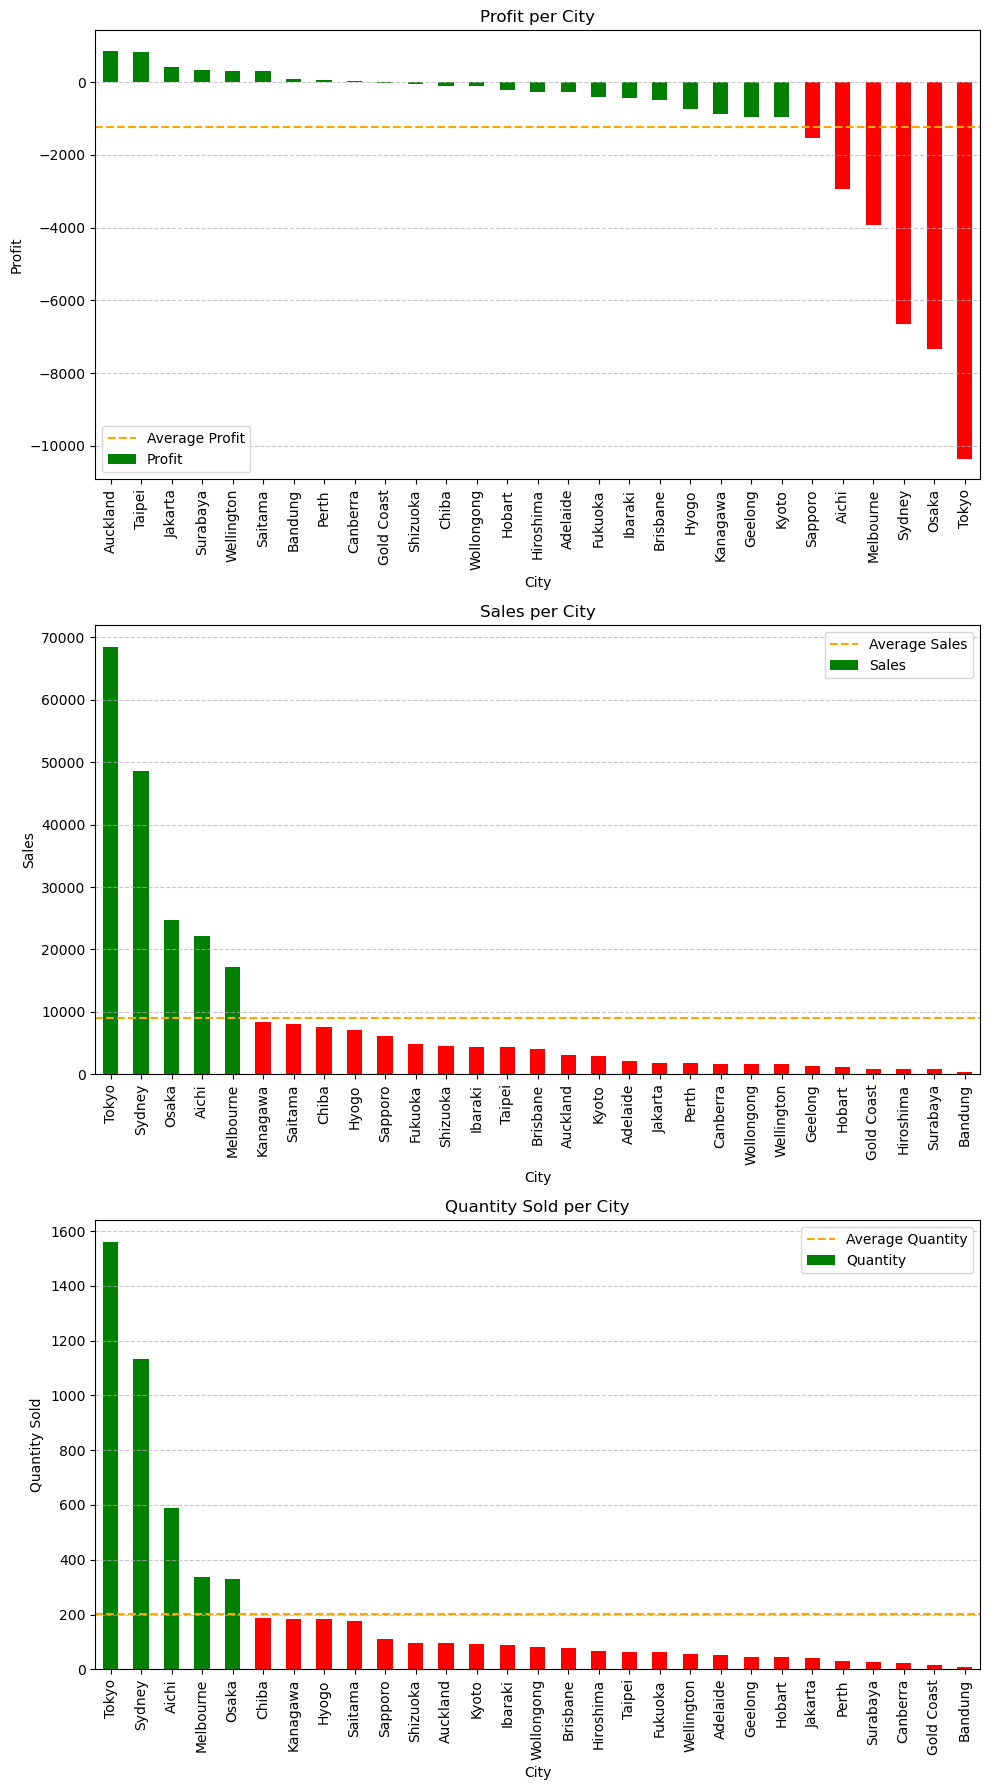

In [154]:
# Create a new DataFrame without the rows containing 'South Korea' and 'Singapore'
df_filtered = df_apj.drop(df_apj[df_apj['Country'].isin(['India','South Korea', 'Singapore','Philippines','China'])].index)

# Grouping and calculations
city_profit = df_filtered.groupby('City')['Profit'].sum()
city_profit = city_profit.sort_values(ascending=False)
avg_profit = city_profit.mean()

city_sales = df_filtered.groupby('City')['Sales'].sum()
city_sales = city_sales.sort_values(ascending=False)
avg_sales = city_sales.mean()

city_quantity = df_filtered.groupby('City')['Quantity'].sum()
city_quantity = city_quantity.sort_values(ascending=False)
avg_quantity = city_quantity.mean()

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Plot for profit
colors_profit = ['green' if profit >= avg_profit else 'red' for profit in city_profit]
city_profit.plot(kind='bar', color=colors_profit, ax=axs[0])
axs[0].axhline(y=avg_profit, color='orange', linestyle='--', linewidth=1.5, label='Average Profit')
axs[0].set_title('Profit per City')
axs[0].set_xlabel('City')
axs[0].set_ylabel('Profit')
axs[0].legend()
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot for sales
colors_sales = ['green' if sales >= avg_sales else 'red' for sales in city_sales]
city_sales.plot(kind='bar', color=colors_sales, ax=axs[1])
axs[1].axhline(y=avg_sales, color='orange', linestyle='--', linewidth=1.5, label='Average Sales')
axs[1].set_title('Sales per City')
axs[1].set_xlabel('City')
axs[1].set_ylabel('Sales')
axs[1].legend()
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

# Plot for quantity
colors_quantity = ['green' if quantity >= avg_quantity else 'red' for quantity in city_quantity]
city_quantity.plot(kind='bar', color=colors_quantity, ax=axs[2])
axs[2].axhline(y=avg_quantity, color='orange', linestyle='--', linewidth=1.5, label='Average Quantity')
axs[2].set_title('Quantity Sold per City')
axs[2].set_xlabel('City')
axs[2].set_ylabel('Quantity Sold')
axs[2].legend()
axs[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Based on the analysis, **the top-performing cities** from the selections are:

**Profit**
1. Auckland
2. Taipei
3. Jakarta

**Sales**
1. Tokyo
2. Sydney
3. Osaka

**Quantity**
1. Tokyo
2. Sydney
3. Aichi


On the other hand, **the worst-performing cities** from the selections are:

**Profit**
1. Tokyo
2. Osaka
3. Sydney

**Sales**
1. Bandung
2. Surabaya
3. Hiroshima

**Quantity**
1. Bandung
2. Gold Coast
3. Canberra

To identify the city that is the worst-performing across all criteria, we can calculate the cumulative score based on the rankings. The city with the highest cumulative score is considered the worst-performing.

**Profit**
1. Tokyo: +3
2. Osaka: +2
3. Sydney: +1

**Sales**
1. Bandung: +3
2. Surabaya: +2
3. Hiroshima: +1

**Quantity**
1. Bandung: +3
2. Gold Coast: +2
3. Canberra: +1

**Result:**
1. Bandung: 3 + 3 = 6
2. Tokyo: 3
3. Gold Coast: 2
4. Osaka: 2
5. Surabaya: 2
6. Canberra: 1
7. Hiroshima: 1
8. Sydney: 1

Based on the analysis, **Bandung** emerges as the worst-performing city across the criteria considered, both within the APJ region and among the top and worst-performing countries.

It's important to note that this designation doesn't diminish the significance of other cities; rather, it highlights areas where focused attention may be needed.

#### **4.3. Customer Segmentation Analysis**

##### **4.3.1. Measures per Segment**

Based on the dataset, the AWS team has divided the companies into 3 segments, which are: Enterprise, SMB, and Strategic.

For reference, I believe these are the definition for each segment:
<br>
- **Enterprise**: Large, complex organizations with significant revenue and extensive needs.
- **Small and Medium-sized Businesses (SMB)**: Smaller companies with fewer employees and simpler needs.
- **Strategic**: Key accounts critical to the company's strategy, regardless of size.

As an overview, we will first analyze the measures per segment.

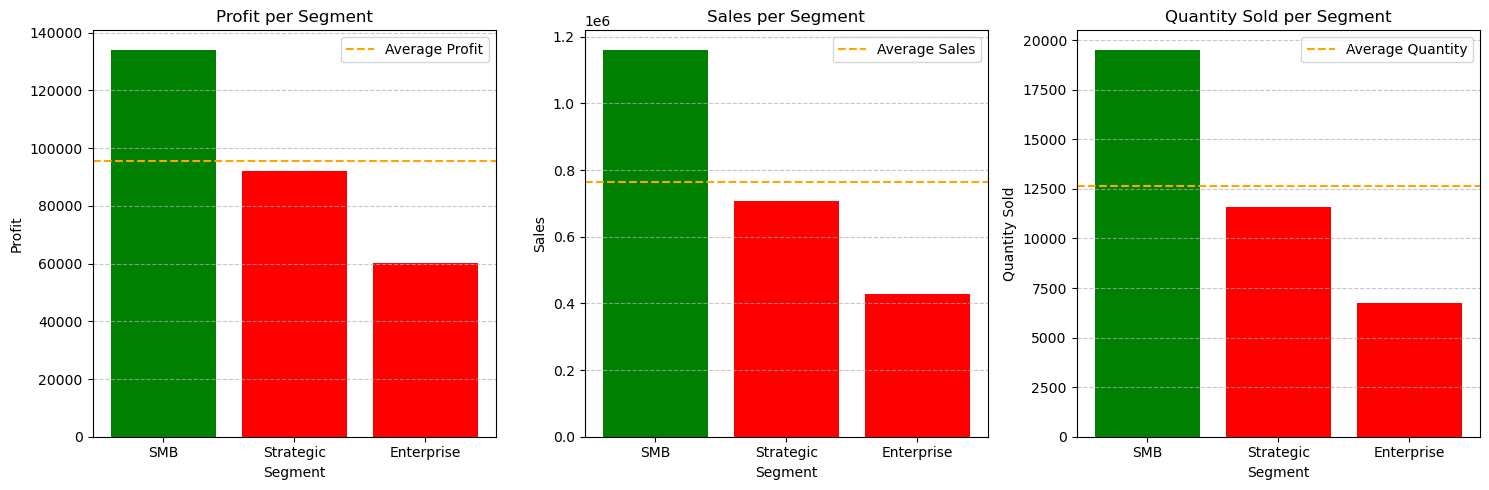

In [155]:
# Grouping, sorting, and calculating average for Profit
segment_profit = df.groupby('Segment')['Profit'].sum().sort_values(ascending=False)
avg_profit = segment_profit.mean()
colors_profit = ['green' if profit >= avg_profit else 'red' for profit in segment_profit]

# Grouping, sorting, and calculating average for Sales
segment_sales = df.groupby('Segment')['Sales'].sum().sort_values(ascending=False)
avg_sales = segment_sales.mean()
colors_sales = ['green' if sales >= avg_sales else 'red' for sales in segment_sales]

# Grouping, sorting, and calculating average for Quantity
segment_quantity = df.groupby('Segment')['Quantity'].sum().sort_values(ascending=False)
avg_quantity = segment_quantity.mean()
colors_quantity = ['green' if quantity >= avg_quantity else 'red' for quantity in segment_quantity]

# Creating subplots for all three metrics
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot for Profit
axes[0].bar(segment_profit.index, segment_profit, color=colors_profit)
axes[0].axhline(y=avg_profit, color='orange', linestyle='--', linewidth=1.5, label='Average Profit')
axes[0].set_title('Profit per Segment')
axes[0].set_xlabel('Segment')
axes[0].set_ylabel('Profit')
axes[0].legend()
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot for Sales
axes[1].bar(segment_sales.index, segment_sales, color=colors_sales)
axes[1].axhline(y=avg_sales, color='orange', linestyle='--', linewidth=1.5, label='Average Sales')
axes[1].set_title('Sales per Segment')
axes[1].set_xlabel('Segment')
axes[1].set_ylabel('Sales')
axes[1].legend()
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Plot for Quantity
axes[2].bar(segment_quantity.index, segment_quantity, color=colors_quantity)
axes[2].axhline(y=avg_quantity, color='orange', linestyle='--', linewidth=1.5, label='Average Quantity')
axes[2].set_title('Quantity Sold per Segment')
axes[2].set_xlabel('Segment')
axes[2].set_ylabel('Quantity Sold')
axes[2].legend()
axes[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

As illustrated, there are **no significant differences among profit, sales, and quantity rankings**. In all categories, SMB ranks first, Strategic comes second, and Enterprise ranks last.

##### **4.3.2. Measures per Industry**

Industries have unique demands and competitive landscapes, so examining AWS's performance in each can reveal strengths and weaknesses that are not apparent when looking at overall market share alone. For instance, a strong presence in a high-growth industry can drive future market share gains, while underperformance in a critical industry might indicate a need for strategic adjustments. Therefore, it's important to look at AWS's profit, sales, and quantity metrics per industry to get a comprehensive view of its market position and growth potential.

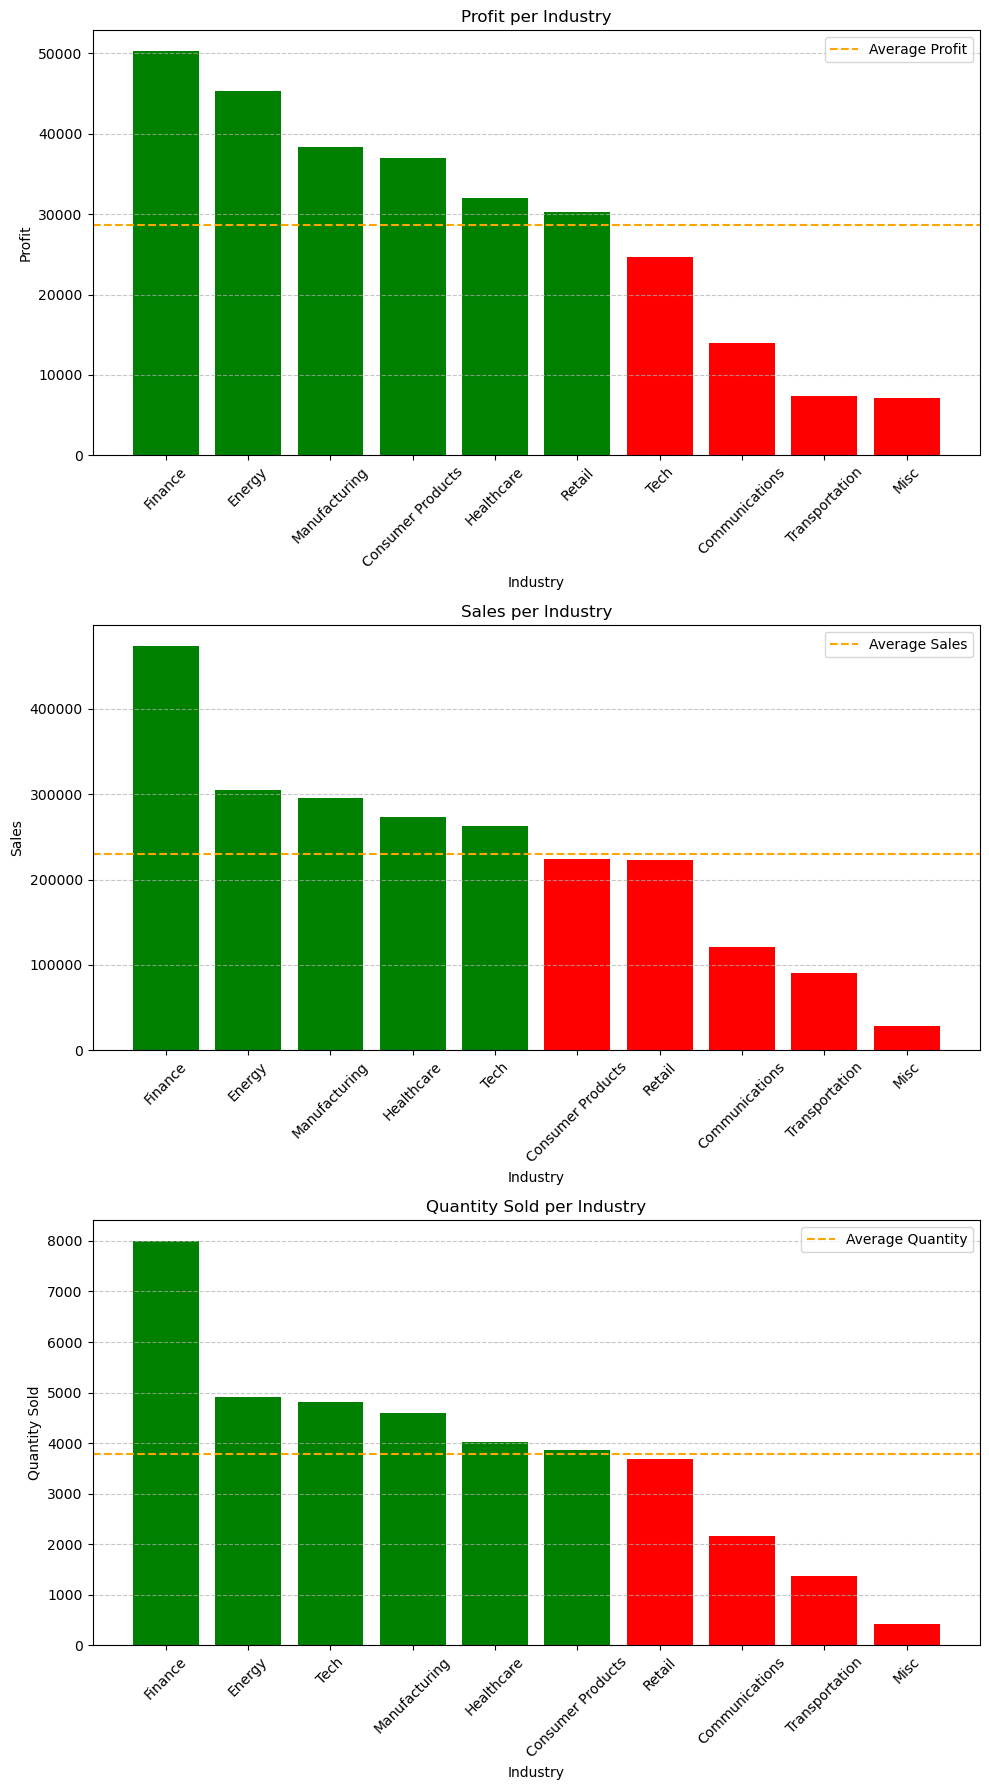

In [156]:
# Grouping, sorting, and calculating average for Profit
industry_profit = df.groupby('Industry')['Profit'].sum().sort_values(ascending=False)
avg_profit = industry_profit.mean()
colors_profit = ['green' if profit >= avg_profit else 'red' for profit in industry_profit]

# Grouping, sorting, and calculating average for Sales
industry_sales = df.groupby('Industry')['Sales'].sum().sort_values(ascending=False)
avg_sales = industry_sales.mean()
colors_sales = ['green' if sales >= avg_sales else 'red' for sales in industry_sales]

# Grouping, sorting, and calculating average for Quantity
industry_quantity = df.groupby('Industry')['Quantity'].sum().sort_values(ascending=False)
avg_quantity = industry_quantity.mean()
colors_quantity = ['green' if quantity >= avg_quantity else 'red' for quantity in industry_quantity]

# Creating subplots for all three metrics
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 18))

# Plot for Profit
axes[0].bar(industry_profit.index, industry_profit, color=colors_profit)
axes[0].axhline(y=avg_profit, color='orange', linestyle='--', linewidth=1.5, label='Average Profit')
axes[0].set_title('Profit per Industry')
axes[0].set_xlabel('Industry')
axes[0].set_ylabel('Profit')
axes[0].legend()
axes[0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0].tick_params(axis='x', rotation=45)

# Plot for Sales
axes[1].bar(industry_sales.index, industry_sales, color=colors_sales)
axes[1].axhline(y=avg_sales, color='orange', linestyle='--', linewidth=1.5, label='Average Sales')
axes[1].set_title('Sales per Industry')
axes[1].set_xlabel('Industry')
axes[1].set_ylabel('Sales')
axes[1].legend()
axes[1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1].tick_params(axis='x', rotation=45)

# Plot for Quantity
axes[2].bar(industry_quantity.index, industry_quantity, color=colors_quantity)
axes[2].axhline(y=avg_quantity, color='orange', linestyle='--', linewidth=1.5, label='Average Quantity')
axes[2].set_title('Quantity Sold per Industry')
axes[2].set_xlabel('Industry')
axes[2].set_ylabel('Quantity Sold')
axes[2].legend()
axes[2].grid(axis='y', linestyle='--', alpha=0.7)
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

The analysis reveals that AWS's **strongest industries** in terms of **profit and sales** are **finance, energy, and manufacturing**, while the **weakest** are **miscellaneous, transportation, and communication**.

For **quantity**, **finance, energy, and tech** are the **leaders**, with the **same weakest industries**.

This consistency across profit and sales highlights AWS's strong foothold in finance and energy sectors, indicating these industries as key drivers of its market performance. The varied placement of other industries suggests diverse performance dynamics.

#### **4.4. Recency, Frequency, and Monetary (RFM) Analysis**

As a suggestion to further enhance AWS's market value, RFM Analysis is needed to categorize different countries and customers into groups. This will help pinpoint areas of strength and opportunities for improvement. Here are the analyses for each category:

##### **4.4.1. RFM on Country**

RFM on Country will segment the countries into countries with High Opportunity, Growing Markets, Underdeveloped Markets, and At Risk/Need Attention.

In [157]:
# Define reference date for recency calculation
reference_date = df['Order Date'].max() + pd.Timedelta(days=1)

# Group by 'Country' and calculate Recency, Frequency, and Monetary values
df_country = df.groupby('Country').agg(
    Recency=('Order Date', lambda x: (reference_date - x.max()).days),  # Days since last order
    Frequency=('Order ID', 'nunique'),  # Number of unique orders
    Monetary=('Sales', 'sum')  # Total sales
).reset_index()

# Describing the data to get Q1, Q2, and Q3 for the criterias
df_country.describe()

,Recency,Frequency,Monetary
count,48.000000,48.000000,48.000000
mean,41.354167,104.375000,47858.351256
std,100.141493,179.845398,81510.619390
min,1.000000,1.000000,919.910000
25%,3.750000,21.750000,8817.455000
50%,8.500000,44.000000,22416.553000
75%,27.250000,95.250000,50210.720000
max,470.000000,1021.000000,457687.631500


In [158]:
# Function to calculate RFM scores and segment
def rfm_segment(row):
    # Recency
    if row['Recency'] <= 3.75:
        r_score = 4
    elif row['Recency'] <= 8.5:
        r_score = 3
    elif row['Recency'] <= 27.25:
        r_score = 2
    else:
        r_score = 1
    
    # Frequency
    if row['Frequency'] <= 21.75:
        f_score = 1
    elif row['Frequency'] <= 44:
        f_score = 2
    elif row['Frequency'] <= 95.25:
        f_score = 3
    else:
        f_score = 4

    # Monetary
    if row['Monetary'] <= 8817.455:
        m_score = 1
    elif row['Monetary'] <= 22416.553:
        m_score = 2
    elif row['Monetary'] <= 50210.72:
        m_score = 3
    else:
        m_score = 4
    
    rfm_segment = f"{r_score}{f_score}{m_score}"
    rfm_score = r_score + f_score + m_score
    
    return pd.Series([rfm_segment, rfm_score])

# Apply the RFM segment function and create new columns
df_country[['RFM Segment', 'RFM Score']] = df_country.apply(rfm_segment, axis=1)

# Function to label RFM segments
def rfm_label(row):
    if row['RFM Score'] >= 11:
        return 'High Opportunity'
    elif 8 <= row['RFM Score'] < 11:
        return 'Growing Markets'
    elif 5 <= row['RFM Score'] < 8:
        return 'Underdeveloped Markets'
    else:
        return 'At Risk/Need Attention'

# Print results
df_country['RFM Label'] = df_country.apply(rfm_label, axis=1)
df_country

,Country,Recency,Frequency,Monetary,RFM Segment,RFM Score,RFM Label
0,Argentina,6,61,35764.3120,333,9,Growing Markets
1,Australia,3,276,80166.1010,444,12,High Opportunity
2,Austria,353,4,2865.0200,111,3,At Risk/Need Attention
3,Belgium,44,56,17431.1500,132,6,Underdeveloped Markets
4,Brazil,2,117,76269.6140,444,12,High Opportunity
5,Canada,2,256,138641.2700,444,12,High Opportunity
6,Chile,7,108,35282.0010,343,10,Growing Markets
7,China,33,46,23705.5230,133,7,Underdeveloped Markets
8,Colombia,10,20,8481.7100,211,4,At Risk/Need Attention
9,Costa Rica,5,23,7464.9300,321,6,Underdeveloped Markets


###### *I opted not to limit the results, allowing for flexibility in case we need to refer to a specific country in the future.*

In [159]:
# Calculate the percentage of each RFM label
percentage = df_country['RFM Label'].value_counts() / len(df_country) * 100

# Define the desired order of the labels
desired_order = ['High Opportunity', 'Growing Markets', 'Underdeveloped Markets', 'At Risk/Need Attention']

# Reindex the percentage Series to ensure the order
percentage = percentage.reindex(desired_order)

# Display the reordered percentages
percentage

RFM Label
High Opportunity          18.750000
Growing Markets           22.916667
Underdeveloped Markets    41.666667
At Risk/Need Attention    16.666667
Name: count, dtype: float64

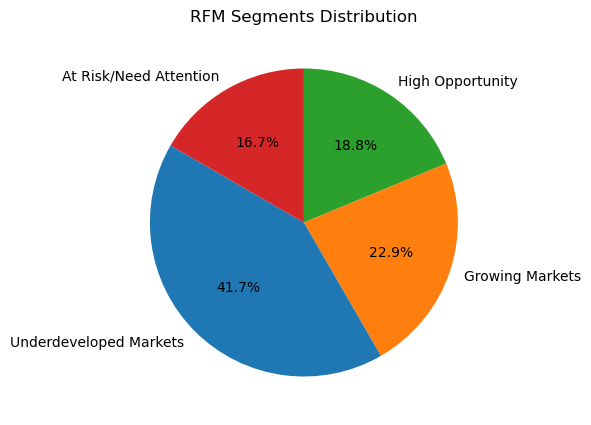

In [160]:
# Calculate the value counts for each RFM label
rfm_counts = df_country['RFM Label'].value_counts()

# Reindex the value counts to ensure the order
rfm_counts = rfm_counts.reindex(desired_order)

# Plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(rfm_counts, labels=rfm_counts.index, autopct='%1.1f%%', startangle=90, counterclock=False, colors=['#2ca02c', '#ff7f0e', '#1f77b4', '#d62728'])
plt.title('RFM Segments Distribution')
plt.show()

There are some things that can be inferred from the results:

**High Opportunity (18.75%)**: This segment represents a promising group of countries with high RFM scores, indicating that they have recently made frequent and substantial purchases.

**Growing Markets (22.92%)**: Countries in this segment are showing signs of growth, with increasing levels of recency, frequency, and monetary value compared to other segments.

**Underdeveloped Markets (41.67%)**: The largest segment comprises countries that are relatively underdeveloped in terms of RFM metrics. While they may have made some purchases, they have lower recency, frequency, and monetary values compared to the other segments.

**At Risk/Need Attention (16.67%)**: Countries in this segment exhibit characteristics indicating potential risks or areas needing attention. They may have low RFM scores, suggesting declining engagement or challenges in generating revenue. It's crucial to investigate the underlying factors contributing to their lower performance and implement corrective actions to mitigate risks and improve their RFM metrics.

##### **4.4.2. RFM on Customer**

RFM on Customer will segment the customers (businesses, to be exact, as SaaS is a B2B Business) into Top Customers, Loyal Customers, Immediate Attention, and At Risk/Need Attention.

In [161]:
# Define reference date for recency calculation
reference_date = df['Order Date'].max() + pd.Timedelta(days=1)

# Group by 'Customer' and calculate Recency, Frequency, and Monetary values
df_customers = df.groupby('Customer').agg(
    Recency=('Order Date', lambda x: (reference_date - x.max()).days),
    Frequency=('Order ID', 'nunique'),
    Monetary=('Sales', 'sum')
).reset_index()

# Describing the data to get Q1, Q2, and Q3 for the criterias
df_customers.describe()

,Recency,Frequency,Monetary
count,99.000000,99.000000,99.000000
mean,20.343434,50.595960,23204.049094
std,30.589835,17.537667,10006.663857
min,1.000000,13.000000,5402.902000
25%,5.500000,38.500000,15692.639000
50%,10.000000,52.000000,22650.820600
75%,23.000000,60.000000,29486.288500
max,240.000000,103.000000,55719.210000


In [162]:
# Function to calculate RFM scores and segment
def rfm_segment(row):
    # Recency
    if row['Recency'] <= 5.5:
        r_score = 4
    elif row['Recency'] <= 10:
        r_score = 3
    elif row['Recency'] <= 23:
        r_score = 2
    else:
        r_score = 1
    
    # Frequency
    if row['Frequency'] <= 38.5:
        f_score = 1
    elif row['Frequency'] <= 52:
        f_score = 2
    elif row['Frequency'] <= 60:
        f_score = 3
    else:
        f_score = 4

    # Monetary
    if row['Monetary'] <= 15692.639:
        m_score = 1
    elif row['Monetary'] <= 22650.820600:
        m_score = 2
    elif row['Monetary'] <= 29486.288500:
        m_score = 3
    else:
        m_score = 4
    
    rfm_segment = f"{r_score}{f_score}{m_score}"
    rfm_score = r_score + f_score + m_score

    return pd.Series([rfm_segment, rfm_score])

# Apply the RFM segment function and create new columns
df_customers[['RFM Segment', 'RFM Score']] = df_customers.apply(rfm_segment, axis=1)

# Function to label RFM segments
def rfm_label(row):
    if row['RFM Score'] >= 11:
        return 'Top Customers'
    elif 8 <= row['RFM Score'] < 11:
        return 'Loyal Customers'
    elif 5 <= row['RFM Score'] < 8:
        return 'Immediate Attention'
    else:
        return 'At Risk/Need Attention'
    
# Print results
df_customers['RFM Label'] = df_customers.apply(rfm_label, axis=1)
df_customers

,Customer,Recency,Frequency,Monetary,RFM Segment,RFM Score,RFM Label
0,AT&T,10,67,29462.3240,343,10,Loyal Customers
1,Abbott Laboratories,13,31,12617.1140,211,4,At Risk/Need Attention
2,Aetna,22,76,27278.5930,243,9,Loyal Customers
3,Airbus,28,58,29798.5930,134,8,Loyal Customers
4,Allianz,2,102,42904.1670,444,12,Top Customers
...,...,...,...,...,...,...,...
94,Volkswagen,22,65,35200.4240,244,10,Loyal Customers
95,Walgreens,15,33,14420.6190,211,4,At Risk/Need Attention
96,Walmart,21,46,21508.1790,222,6,Immediate Attention
97,Walt Disney,23,53,29483.0050,233,8,Loyal Customers


###### *I opted not to limit the results, allowing for flexibility in case we need to refer to a specific country in the future.*

In [163]:
# Calculate the percentage of each RFM label
percentage = df_customers['RFM Label'].value_counts() / len(df_customers) * 100

# Define the desired order of the labels
desired_order = ['Top Customers', 'Loyal Customers', 'Immediate Attention', 'At Risk/Need Attention']

# Reindex the percentage Series to ensure the order
percentage = percentage.reindex(desired_order)

# Display the reordered percentages
percentage

RFM Label
Top Customers             16.161616
Loyal Customers           33.333333
Immediate Attention       34.343434
At Risk/Need Attention    16.161616
Name: count, dtype: float64

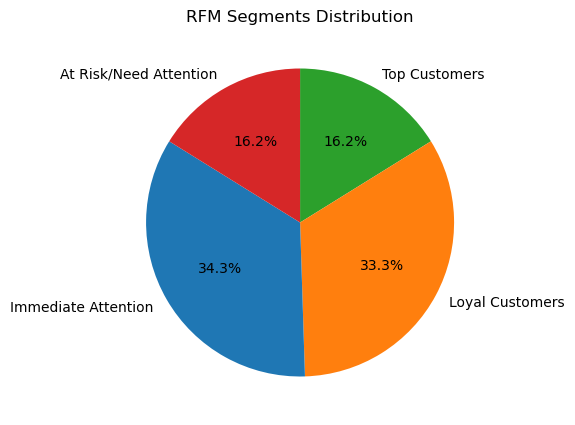

In [164]:
# Calculate the value counts for each RFM label
rfm_counts = df_customers['RFM Label'].value_counts()

# Reindex the value counts to ensure the order
rfm_counts = rfm_counts.reindex(desired_order)

# Plot the pie chart
plt.figure(figsize=(5, 5))
plt.pie(rfm_counts, labels=rfm_counts.index, autopct='%1.1f%%', startangle=90, counterclock=False, colors=['#2ca02c', '#ff7f0e', '#1f77b4', '#d62728'])
plt.title('RFM Segments Distribution')
plt.show()

Just like the previous one, this chart also have some things that can be inferred from the results:

**Top Customers (16.16%)**: These customers are the highest spenders or most frequent purchasers, contributing a substantial portion of the total revenue. While they may not represent the largest segment in terms of percentage, they play a crucial role in driving short-term revenue and should be treated as valuable assets to the business.

**Loyal Customers (33.33%)**: This segment represents customers who demonstrate loyalty to the brand by making frequent purchases over an extended period. They contribute a significant portion of the customer base and are likely to have a higher customer lifetime value. Focusing on retaining and nurturing these loyal customers can lead to long-term profitability and sustainability.

**Immediate Attention (34.34%)**: Customers in this segment may have exhibited behavior indicating a need for immediate attention or intervention. It's essential to investigate the underlying reasons for their classification and take proactive measures to address any issues or concerns they may have. This could include targeted marketing campaigns, personalized offers, or improved customer service experiences to re-engage them with the brand.

**At Risk/Need Attention (16.16%)**: Similar to the "Immediate Attention" segment, these customers may also require intervention to prevent churn or decline in engagement. Strategies aimed at reactivating dormant customers, resolving dissatisfaction, or addressing specific pain points may be necessary to retain them and improve their RFM metrics.

***
### **5. Final Thoughts**

#### **5.1. Conclusion**

Our analysis of the AWS SaaS Sales Dataset has revealed several key insights and trends:

1. **Trends in Sales, Profit, and Quantity Sold:**
   - **Profit:** There is a consistent year-over-year increase in profit, reflecting the growing adoption of SaaS solutions.
   - **Sales:** Despite a temporary decline between 2020 and 2022 due to the COVID-19 pandemic, AWS experienced a strong recovery in sales.
   - **Quantity Sold:** A steady upward trend indicates sustained demand and distribution growth.
   - **Discrepancy:** Despite positive trends in profit, sales, and quantity, AWS’s market share has declined, suggesting the influence of external competitive factors or internal inefficiencies.

2. **Regional Performance:**
   - **APJ Region:** This region is the weakest performing overall across all metrics (profit, sales, quantity).
   - **Top-Performing Countries in APJ:**
     - **Profit:** India, Philippines, China
     - **Sales:** Japan, Australia, India
     - **Quantity:** Japan, Australia, India
   - **Worst-Performing Countries in APJ:**
     - **Profit:** Japan, Australia, Taiwan
     - **Sales:** Indonesia, Taiwan, New Zealand
     - **Quantity:** Taiwan, Indonesia, New Zealand

3. **City Performance:**
   - **Top-Performing Cities:**
     - **Profit:** Auckland, Taipei, Jakarta
     - **Sales:** Tokyo, Sydney, Osaka
     - **Quantity:** Tokyo, Sydney, Aichi
   - **Worst-Performing Cities:**
     - **Profit:** Tokyo, Osaka, Sydney
     - **Sales:** Bandung, Surabaya, Hiroshima
     - **Quantity:** Bandung, Gold Coast, Canberra
   - **Overall Worst-Performing City:** Bandung

4. **Customer Segmentation:**
   - **Segment Rankings:** SMB ranks highest across all categories (profit, sales, quantity), followed by Strategic, and then Enterprise.
   - **Industry Performance:**
     - **Strongest Industries:** Finance, energy, manufacturing (profit and sales); finance, energy, tech (quantity)
     - **Weakest Industries:** Miscellaneous, transportation, communication (across all metrics)

5. **RFM Analysis:**
   - **Countries:** Majority are in the Underdeveloped Markets category (41.67%), followed by Growing Markets (22.92%), High Opportunity (18.75%), and At Risk/Need Attention (16.67%).
   - **Customers:** Immediate Attention (34.34%), Loyal Customers (33.33%), Top Customers (16.16%), At Risk/Need Attention (16.16%).


#### **5.2. Recommendation**

Based on the insights from our analysis, we recommend the following actions to address AWS’s market share decline and uncover new opportunities for growth and improvement:

1. **Addressing Market Share Discrepancy:**
   - **Competitive Analysis:** Conduct a deeper competitive analysis to understand why AWS’s market share is declining despite positive trends in sales, profit, and quantity.
   - **Customer Feedback:** Gather feedback from customers to identify pain points or areas where competitors may be outperforming AWS.

2. **Improving Regional Performance:**
   - **APJ Region Focus:** Develop targeted strategies to improve performance in the APJ region, with specific focus on the weakest countries (Indonesia, Taiwan, New Zealand).
   - **Localized Marketing:** Implement localized marketing campaigns and partnerships tailored to the unique needs of each country in the APJ region.

3. **City-Level Strategies:**
   - **Bandung:** Conduct a thorough market analysis to understand why Bandung is underperforming across all criteria and implement targeted interventions.
   - **City-Specific Initiatives:** Consider city-specific initiatives such as local events, community engagement, and collaborations to boost performance in underperforming cities.

4. **Customer Segmentation and Targeting:**
   - **SMB Focus:** Given the strong performance of the SMB segment, create tailored offerings and marketing strategies to further capitalize on this segment.
   - **Strategic and Enterprise Segments:** Develop specialized programs to boost the performance of Strategic and Enterprise segments, possibly through enhanced support, customized solutions, and dedicated account management.

5. **Industry-Specific Strategies:**
   - **Strengthen Key Industries:** Continue to strengthen AWS’s presence in the finance, energy, and manufacturing industries through targeted marketing and product development.
   - **Revitalize Weak Industries:** Investigate the challenges faced by the miscellaneous, transportation, and communication industries and develop strategies to improve AWS’s performance in these sectors.

6. **RFM Insights Application:**
   - **High Opportunity and Growing Markets:** Focus on converting high opportunity and growing markets into loyal customers through targeted marketing and tailored offerings.
   - **Immediate Attention:** Develop retention strategies for customers requiring immediate attention to prevent churn and enhance customer satisfaction.

By implementing these strategies, AWS can better address its market share decline, enhance performance, and capitalize on customer segmentation insights to drive growth and improvement.